In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
credit_fraud = pd.read_csv("credit-fraud-train.csv")
credit_fraud.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [3]:
credit_fraud_shuffled = credit_fraud.sample(frac=1)

In [4]:
credit_fraud_shuffled.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
477487,148,'C1468001998','3','F','28007','M1823072687','28007','es_transportation',7.02,0
457774,143,'C1067668919','2','F','28007','M348934600','28007','es_transportation',4.27,0
102361,37,'C1255236689','1','F','28007','M1823072687','28007','es_transportation',27.21,0
226435,76,'C1800696439','5','M','28007','M78078399','28007','es_wellnessandbeauty',41.95,0
322975,105,'C59263760','4','F','28007','M1823072687','28007','es_transportation',34.68,0


In [5]:
# Splitting data into x and y
x = credit_fraud_shuffled.drop("fraud",axis=1)
y = credit_fraud_shuffled["fraud"]

In [6]:
# Create train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# Checking missing values
credit_fraud.isna().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [8]:
credit_fraud_shuffled.gender.value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

In [9]:
credit_fraud_shuffled[credit_fraud_shuffled["gender"] == "'M'"]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
226435,76,'C1800696439','5','M','28007','M78078399','28007','es_wellnessandbeauty',41.95,0
152162,53,'C546957379','5','M','28007','M348934600','28007','es_transportation',4.17,0
434330,136,'C1700550154','6','M','28007','M1823072687','28007','es_transportation',6.41,0
593476,179,'C1806072501','5','M','28007','M85975013','28007','es_food',34.83,0
265057,88,'C576453501','4','M','28007','M348934600','28007','es_transportation',33.79,0
...,...,...,...,...,...,...,...,...,...,...
535806,164,'C1568308501','3','M','28007','M1823072687','28007','es_transportation',42.55,0
494894,153,'C61142824','3','M','28007','M1823072687','28007','es_transportation',53.45,0
351301,113,'C1075692577','3','M','28007','M1823072687','28007','es_transportation',19.93,0
117961,42,'C188084843','2','M','28007','M348934600','28007','es_transportation',37.98,0


### Get data ready
* Split into x and y
* Find out missing values and perform imputation
* Convert non-numeric values to numeric

In [10]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [11]:
# Convert non-numerics to numerics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["customer", "age", "gender", "zipcodeOri", "merchant", "zipMerchant", "category"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot", oneHot, categorical_features)], remainder="passthrough")
transformed_x = transformer.fit_transform(x)

In [12]:
transformed_x

<594643x4193 sparse matrix of type '<class 'numpy.float64'>'
	with 5349305 stored elements in Compressed Sparse Row format>

In [13]:
pd.DataFrame(transformed_x).head()

,0
0,"(0, 1014)\t1.0\n (0, 4115)\t1.0\n (0, 4121..."
1,"(0, 143)\t1.0\n (0, 4114)\t1.0\n (0, 4121)..."
2,"(0, 570)\t1.0\n (0, 4113)\t1.0\n (0, 4121)..."
3,"(0, 1735)\t1.0\n (0, 4117)\t1.0\n (0, 4122..."
4,"(0, 3239)\t1.0\n (0, 4116)\t1.0\n (0, 4121..."


In [14]:
%%time
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
clf.fit(x_train, y_train)

Wall time: 0 ns


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print(f"{round(clf.score(x_test, y_test)*100,2)}% accuracy")

99.64% accuracy


In [16]:
print(f"{round(clf.score(x_train, y_train)*100,2)}% accuracy")

100.0% accuracy


In [17]:
print(f"{round(clf.score(x_test, y_test)*100,2)}% accuracy")

99.64% accuracy


In [18]:
# Make predictions
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9963843974135829

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.003615602586417106

### Performing 2-fold cross validation

In [20]:
%%time
from sklearn.model_selection import cross_val_score
cross_val_score(clf, transformed_x, y, cv=2)

Wall time: 2min 47s


array([0.99630703, 0.99627339])

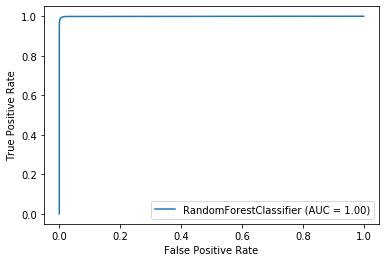

In [21]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, transformed_x, y);

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_preds)

0.8887511737787127

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[117392,    115],
       [   315,   1107]], dtype=int64)

In [24]:
pd.crosstab(y_test, y_preds,
            rownames=["Actual target"],
            colnames=["Predicted target"])

Predicted target,0,1
Actual target,,
0,117392,115
1,315,1107


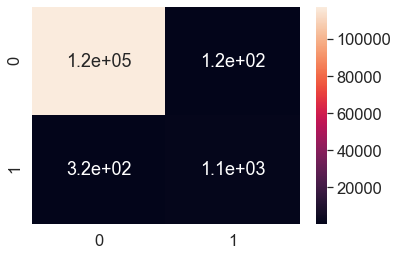

In [25]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat, annot=True);

In [26]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def evaluate_preds(y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    metrics_dict = {"accuracy":accuracy,
                    "precision":precision,
                    "recall":recall,
                    "f1":f1}
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1 score: {f1:.2f}")
    
    return metrics_dict

In [27]:
baseline_metrics = evaluate_preds(y_test, y_preds)

Accuracy: 99.64%
Precision: 0.91
Recall: 0.78
f1 score: 0.84


In [28]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
        "max_depth":[None, 5, 10, 20,30],
        "max_features":["auto", "sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2, 4]}

clf_2 = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf_2,
                        param_distributions=grid,
                        n_iter=2,
                        cv=2,
                        verbose=2)
rs_clf.fit(transformed_x, y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.2s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.5s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total= 2.0min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total= 2.0min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_preds = rs_clf.predict(x_test)

In [32]:
rs_metrics = evaluate_preds(y_test, rs_preds)

Accuracy: 99.49%
Precision: 0.91
Recall: 0.64
f1 score: 0.75


In [35]:
baseline_metrics

{'accuracy': 0.9963843974135829,
 'precision': 0.9058919803600655,
 'recall': 0.7784810126582279,
 'f1': 0.8373676248108926}

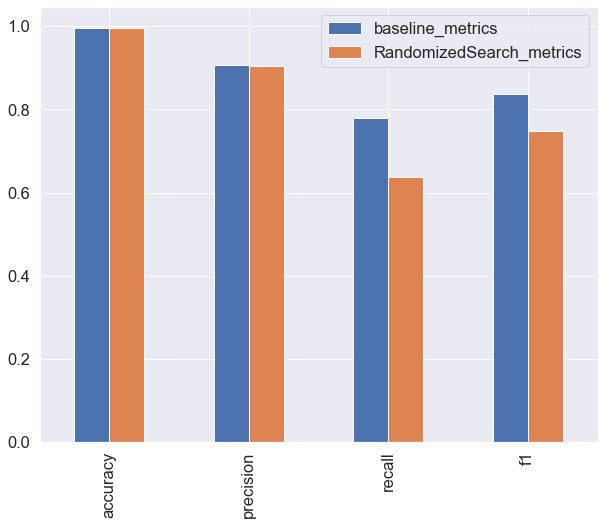

In [34]:
metrics = pd.DataFrame({"baseline_metrics":baseline_metrics,
                        "RandomizedSearch_metrics":rs_metrics})
metrics.plot.bar(figsize=(10,8));

### Feature importance

In [47]:
clf.feature_importances_.shape

(4193,)

In [48]:
x.shape

(594643, 9)

In [56]:
def plot_features(columns, importance, n=5):
    df = (pd.DataFrame({"features":columns,
                        "importances:":importance})
         .sort_values(by="importance")
         .reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.barh(df["features"][:n], df["importances"][:n], color="blue")
    ax.set_xlabel("Features")
    ax.set_ylabel("Feature Importances")
    ax.invert_yaxis()

In [57]:
plot_features(x.columns, clf.feature_importances_)

ValueError: arrays must all be same length

In [44]:
x.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount'],
      dtype='object')